In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:

def create_sin_time_series(ntimesteps, freq):
    x = np.arange(0,2*np.pi*ntimesteps*freq,2*np.pi*freq)
    return np.sin(x)



def create_timeseries(ntimesteps, freqs):
    y = [0]*ntimesteps
    for freq in freqs:
        y = y+create_sin_time_series(ntimesteps=ntimesteps,freq=freq)
    noise = np.random.rand(len(y))
    return y + noise

ntimesteps = 2550
freqs = [1/255,1/30]


y = create_timeseries(ntimesteps=ntimesteps, freqs=freqs)

dataout = pd.DataFrame({
    'y1': create_timeseries(ntimesteps=ntimesteps, freqs=freqs),
    'y2': create_timeseries(ntimesteps=ntimesteps, freqs=freqs),
    'y3': create_timeseries(ntimesteps=ntimesteps, freqs=freqs),
    'y4': create_timeseries(ntimesteps=ntimesteps, freqs=freqs),
    'y5': create_timeseries(ntimesteps=ntimesteps, freqs=freqs),
    'y6': create_timeseries(ntimesteps=ntimesteps, freqs=freqs)
})

dataout.to_csv('data/sin_data.csv')


In [98]:
from scipy import signal

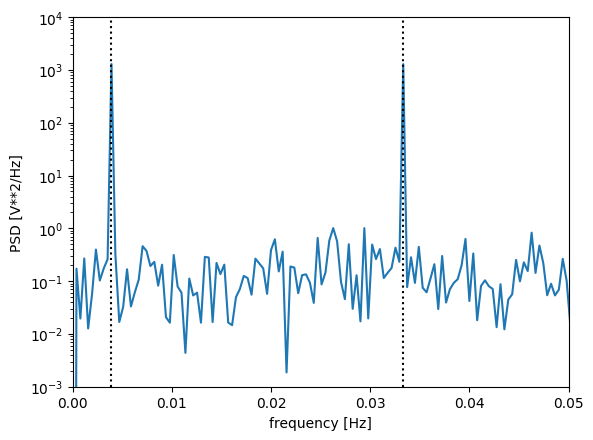

In [119]:
f, Pxx_den = signal.periodogram(dataout.y1,1)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim([0,1/20])
plt.ylim([1e-3,1e4])

plt.plot([1/255,1/255],[1e-3, 1e4], color = 'k',ls=':')
plt.plot([1/30,1/30],[1e-3, 1e4], color = 'k',ls=':')
plt.show()